<a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-sa/4.0/80x15.png" /></a><div align="center">This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Attribution-ShareAlike 4.0 International License</a>.</div>

---

## Preamble

Import NumPy here so we are sure we can use it throughout the notebook.

In [11]:
import numpy as np

----

## Exercise 4.A

Write a function `plotfn(xs, f)` that takes two arguments: a list of numbers `xs` and a mathematical function `f` (one single numerical argument, returns a number) and plots the graph of `f` on the domain `xs`.

First, let us make sure that the graphics modules are loaded and graphics is displayed inline in the notebook.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sea
sea.set_style('darkgrid')

Now, on to the solution proper:

In [2]:
def plotfn(xs, f):
    ys = list(map(f, xs))
    return plt.plot(xs, ys)

We can check the solution by graphing a few well-known functions:

In [3]:
xs = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

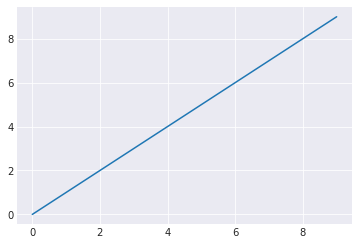

In [4]:
def f1(x):
    return x

plotfn(xs, f1)

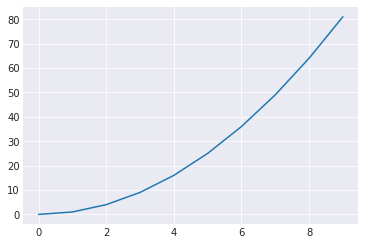

In [5]:
def f2(x):
    return x*x

plotfn(xs, f2)

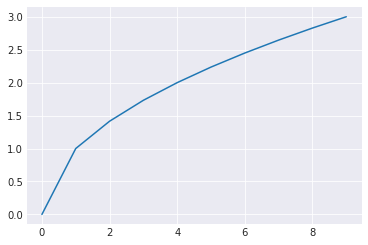

In [6]:
from math import sqrt

def f3(x):
    return sqrt(x)

plotfn(xs, f3)

### Bonus points 

Change the `plotfn()` function so to take an additional argument (a file name) and save the figure into that file.

This requires that we change the structure of the function code a bit and explicitly grab the *axes* (for drawing) and *figure* object (for saving).

In [7]:
def plotfn2(xs, f, filename):
    ax, fig = plt.subplots(1, 1, figsize=[10, 7])
    # do the drawing
    ys = map(f, xs)
    ax.plot(xs, ys)
    # save figure
    fig.savefig(filename)
    return ax

### More bonus points

Change the `plotfn()` function so to take a list of mathematical functions `fs` and plot all of them.

We can adapt the structure of the `plotfn2()` function, and just loop the "drawing" part over the list of functions `fs`:

In [8]:
def plotfn3(xs, fs, filename):
    fig, ax = plt.subplots(1, 1, figsize=[10, 7])
    # do the drawing
    for f in fs:
        ys = list(map(f, xs))
        ax.plot(xs, ys)
    # save figure
    if filename:
        fig.savefig(filename)
    return ax

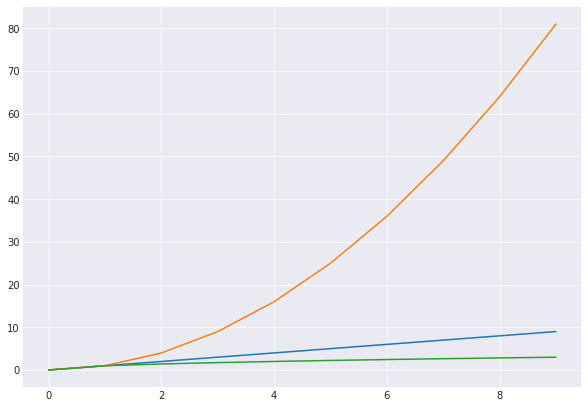

In [9]:
plotfn3(xs, [f1, f2, f3], None)

----

### Exercise 4.B

Plot the graph of function $f(x) = 1/x$

/home/rmurri/w/anaconda3/5.1.0/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


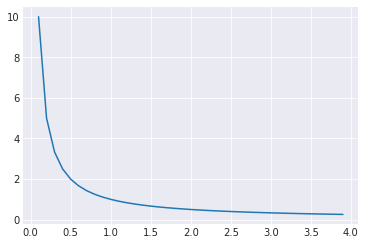

In [16]:
x = np.arange(0, 4, 0.1) # it would be better to start at 0 + (a small amount)
y = 1.0 / x
plt.plot(x, y)